In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn xgboost



   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 3.4 MB/s eta 0:00:22
    --------------------------------------- 1.6/72.0 MB 4.2 MB/s eta 0:00:17
   - -------------------------------------- 2.1/72.0 MB 3.9 MB/s eta 0:00:18
   - -------------------------------------- 2.9/72.0 MB 3.7 MB/s eta 0:00:19
   - -------------------------------------- 3.1/72.0 MB 3.9 MB/s eta 0:00:18
   -- ------------------------------------- 3.7/72.0 MB 3.1 MB/s eta 0:00:23
   -- ------------------------------------- 3.9/72.0 MB 2.9 MB/s eta 0:00:24
   -- ------------------------------------- 4.5/72.0 MB 2.7 MB/s eta 0:00:25
   -- ------------------------------------- 4.7/72.0 MB 2.6 MB/s eta 0:00:26
   -- ------------------------------------- 5.0/72.0 MB 2.4 MB/s eta 0:00:29
   -- ------------------------------------- 5.2/72.0 MB 2.3 MB/s eta 0:00:29
   --- ------------------------------------ 5.5/72.0 MB 2.2 MB/s eta 0:00:30
   --

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [5]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target   # 0 = Malignant, 1 = Benign

print("Dataset Shape:", X.shape)


Dataset Shape: (569, 30)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("LOGISTIC REGRESSION")
print(classification_report(y_test, y_pred_lr))


LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [13]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM RESULTS")
print(classification_report(y_test, y_pred_svm))


SVM RESULTS
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [15]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("RANDOM FOREST")
print(classification_report(y_test, y_pred_rf))


RANDOM FOREST
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [17]:
print("ROC-AUC Scores")
print("Logistic Regression:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print("SVM:", roc_auc_score(y_test, svm.predict_proba(X_test)[:,1]))
print("Random Forest:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


ROC-AUC Scores
Logistic Regression: 0.9953703703703703
SVM: 0.9950396825396826
Random Forest: 0.9932208994708995


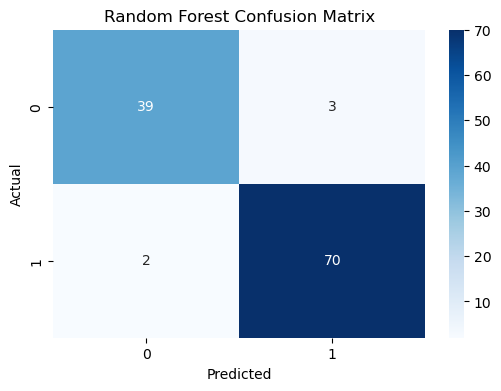

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBOOST RESULTS")
print(classification_report(y_test, y_pred_xgb))


XGBOOST RESULTS
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



C:\Users\Dell\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [01:44:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
